In [49]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras.regularizers import l2

In [50]:
# Setting up data fetching
yf.pdr_override() 
ticker = 'PG'
begin = '2010-01-01'
df = yf.download(ticker, start=begin)

[*********************100%***********************]  1 of 1 completed


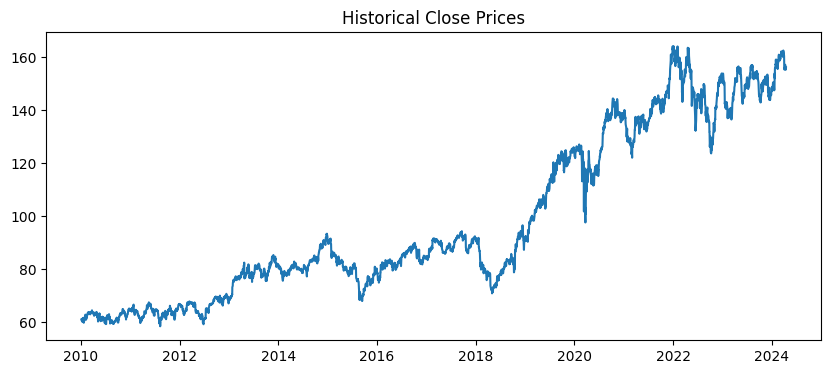

In [51]:
# Plotting closing prices
plt.figure(figsize=(10, 4))
plt.plot(df['Close'])
plt.title('Historical Close Prices')
plt.show()

In [52]:
# Adding technical indicators
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

In [53]:
# Feature selection
features = ['Close', 'MA50', 'MA200']
df.dropna(inplace=True)  # Removing rows with NaN values

In [54]:
# Data normalization
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[features])

In [55]:
# Function to create dataset in time series format for LSTM model
def create_dataset(dataset, look_back=50):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back)]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [56]:
# Splitting dataset into train and test
split_percent = 0.70
split = int(split_percent * len(scaled_data))
train = scaled_data[:split]
test = scaled_data[split:]

In [57]:
# Preparing train and test data
look_back = 50
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [58]:
# Reshaping input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], look_back, len(features))
X_test = X_test.reshape(X_test.shape[0], look_back, len(features))

In [59]:
# Creating LSTM model with Dropout greed search
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(look_back, len(features))),
    Dropout(0.5),
    LSTM(100, return_sequences=True),
    Dropout(0.5),
    LSTM(50),
    Dense(1, activation='linear')
])

In [60]:
# Compiling the model with a custom learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 50, 100)           41600     
                                                                 
 dropout_6 (Dropout)         (None, 50, 100)           0         
                                                                 
 lstm_11 (LSTM)              (None, 50, 100)           80400     
                                                                 
 dropout_7 (Dropout)         (None, 50, 100)           0         
                                                                 
 lstm_12 (LSTM)              (None, 50)                30200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 152,251
Trainable params: 152,251
Non-tr

In [61]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

In [62]:
# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
73/73 [==============================] - 10s 89ms/step - loss: 0.0030 - val_loss: 0.0119
Epoch 2/50
73/73 [==============================] - 6s 77ms/step - loss: 5.5064e-04 - val_loss: 0.0111
Epoch 3/50
73/73 [==============================] - 6s 83ms/step - loss: 5.7015e-04 - val_loss: 0.0025
Epoch 4/50
73/73 [==============================] - 6s 77ms/step - loss: 4.5235e-04 - val_loss: 0.0072
Epoch 5/50
73/73 [==============================] - 5s 75ms/step - loss: 4.5474e-04 - val_loss: 0.0066
Epoch 6/50
73/73 [==============================] - 5s 75ms/step - loss: 4.3663e-04 - val_loss: 0.0020
Epoch 7/50
73/73 [==============================] - 6s 77ms/step - loss: 3.8067e-04 - val_loss: 0.0038
Epoch 8/50
73/73 [==============================] - 5s 75ms/step - loss: 3.6409e-04 - val_loss: 0.0032
Epoch 9/50
73/73 [==============================] - 6s 76ms/step - loss: 4.1584e-04 - val_loss: 0.0023
Epoch 10/50
73/73 [==============================] - 6s 76ms/step - loss: 4.

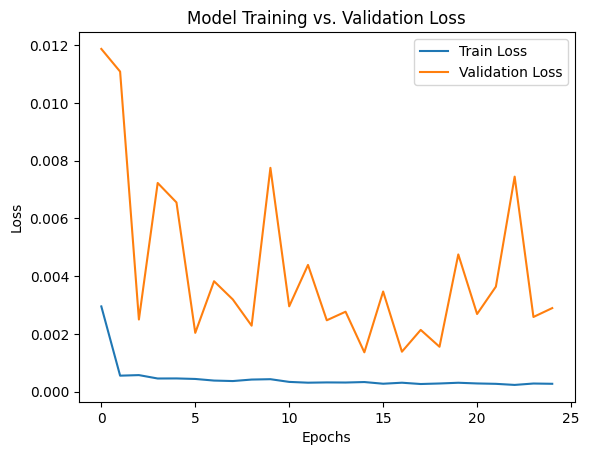

In [63]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [64]:
# Assume X_test and y_test are already defined
predicted_prices = model.predict(X_test)
actual_prices = y_test.reshape(-1, 1)

31/31 [==============================] - 2s 21ms/step


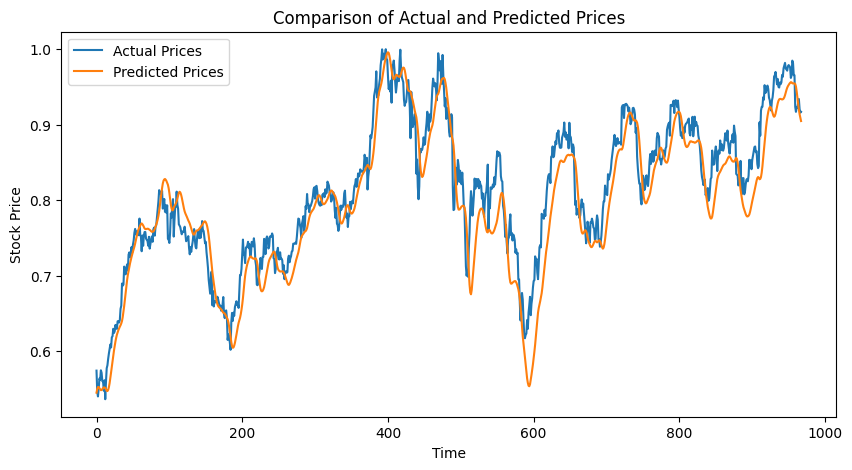

In [65]:

plt.figure(figsize=(10, 5))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title('Comparison of Actual and Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [66]:
# Correcting the shape for LSTM prediction
num_features = 1  # This should match the second dimension of the input shape of your LSTM layer
n_steps = 100

NameError: name 'tmp_inp' is not defined

In [69]:
# Assuming you have a flat list of last 100 days data with each day having 3 features:
# If 'tmp_inp' is a flat list of last known data, it needs to be correctly segmented into shape [1, n_steps, num_features]
fut_inp = np.array(tmp_inp[-n_steps * num_features:]).reshape(1, n_steps, num_features)

NameError: name 'tmp_inp' is not defined

In [ ]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

InvalidArgumentError: Graph execution error:

Specified a list with shape [?,3] from a tensor with shape [1,1]
	 [[{{node TensorArrayUnstack/TensorListFromTensor}}]]
	 [[sequential/lstm/PartitionedCall]] [Op:__inference_predict_function_31325]